## import necessary libraries

In [110]:
import pandas as pd
import csv
import nltk 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Activist Messages

## load data

In [111]:
activist_messages = pd.read_excel('data\\activist_texts.xlsx', sheet_name='activist_texts', header=None, names=['text','label','source'])

In [112]:
activist_messages

,text,label,source
0,Seit der Rebellion Wave Anfang Oktober werden ...,activist,Extinction Rebellion
1,"Als ich geboren wurde, im Juni 1988, betrug di...",activist,Extinction Rebellion
2,Während das Problem der anthropogenen Erderhit...,activist,Extinction Rebellion
3,Demokratie restaurieren bedeutet Vertrauen res...,activist,Extinction Rebellion
4,Gemeinschaft statt Konfrontation\nDie Idee ein...,activist,Extinction Rebellion
5,Das Parlament entmachten?\nDass wir eine Bürge...,activist,Extinction Rebellion
6,DEUTSCHLAND\nObwohl sich viele Rebell:innen wi...,activist,Extinction Rebellion
7,Heute war der letzte Tag unseres wunderbaren K...,activist,Extinction Rebellion
8,IST DAS SCHON REBELLION – ODER NUR MENSCHLICHK...,activist,Extinction Rebellion
9,Mit viel Schwung hatte ich den ersten Blog hie...,activist,Extinction Rebellion


## clean data

In [113]:
activist_messages['text'] = activist_messages['text'].str.replace(':innen','innen')

In [114]:
activist_messages = activist_messages.drop(columns=['source'])

# Posts

## load data

In [135]:
import sqlite3

In [136]:
cnx = sqlite3.connect('data\\million_post_corpus\\corpus.sqlite3')
posts = pd.read_sql_query('SELECT Body AS text, PositiveVotes, NegativeVotes FROM Posts WHERE Body IS NOT NULL AND Body != "" AND LENGTH(Body) > 50', cnx)

In [137]:
posts

,text,PositiveVotes,NegativeVotes
0,Ich bin begeistert von den STANDARD - Newslett...,0,0
1,... Aber momentan funktioniert das Abmelden od...,0,0
2,Es ist ganz einfach nervend!\r\nVor kurzem hab...,0,0
3,...ist dieser newsletterservice - und deshalb ...,0,0
4,eine Zusammenfassung aller Kommentare.\r\nDas ...,0,0
5,Wenn ich in meinen Einstellungen oder hier mei...,0,0
6,"kann das bestätigen, bei mir funktioniert's au...",0,0
7,"derstandard.at-webmaster hat mir geschrieben, ...",0,0
8,"Ja stimmt,der Newsletter geht wirklich wieder!...",0,0
9,bei mir ist alles lesbar. Aber auch hier wie i...,1,0


In [138]:
posts_sample = posts.sample(n=200, random_state=1234)

## create single string to count word frequencies

In [139]:
merged_posts = posts_sample.text.str.cat(sep=' ')

In [140]:
merged_posts

'Der Vektorbegriff ist für die Schüler kein Problem. Vektoren können leicht im Physikunterricht eingeführt werden. \r\nIch verwende Vektoren auch im GZ-Unterricht in der Unterstufe! Arbeiten ist gut, ich musste mir auch seit jeher etwas dazuverdienen. Was aber traurig ist: selbst wenn man ohne Inflationsbereinigung die 18k ATS einfach so in € umrechnet (1.308€) - so viel bekommt man heute kaum mehr bei Ferialjobs. wenn man "die Studierenden" bzw. "die Lehrenden" sagt? Also Koller (NT) - Janko ist schon eine perfekte Symbiose. Was die sich gegenseitig durch perfekte Leistungen schon geholfen haben, ist kaum in die paar Zeilen, die der standard zur Verfügung stellt, zusammenzufassen. Immer weiter so :) Sind es eigentlich ein und die gleichen Menschen, die auf der einen Seite "zuviel mediale Aufmerksamkeit" beklagen (z.B. wenn es um rechte Kundgebungen geht) und sich auf der anderen Seite über "Totschweigen" aufregen (wenn es sich über vermeintliche Asylwerber handelt)? Lest die Krone ode

In [141]:
merged_posts_tokens = word_tokenize(merged_posts)

In [142]:
merged_posts_tokens

['Der',
 'Vektorbegriff',
 'ist',
 'für',
 'die',
 'Schüler',
 'kein',
 'Problem',
 '.',
 'Vektoren',
 'können',
 'leicht',
 'im',
 'Physikunterricht',
 'eingeführt',
 'werden',
 '.',
 'Ich',
 'verwende',
 'Vektoren',
 'auch',
 'im',
 'GZ-Unterricht',
 'in',
 'der',
 'Unterstufe',
 '!',
 'Arbeiten',
 'ist',
 'gut',
 ',',
 'ich',
 'musste',
 'mir',
 'auch',
 'seit',
 'jeher',
 'etwas',
 'dazuverdienen',
 '.',
 'Was',
 'aber',
 'traurig',
 'ist',
 ':',
 'selbst',
 'wenn',
 'man',
 'ohne',
 'Inflationsbereinigung',
 'die',
 '18k',
 'ATS',
 'einfach',
 'so',
 'in',
 '€',
 'umrechnet',
 '(',
 '1.308€',
 ')',
 '-',
 'so',
 'viel',
 'bekommt',
 'man',
 'heute',
 'kaum',
 'mehr',
 'bei',
 'Ferialjobs',
 '.',
 'wenn',
 'man',
 '``',
 'die',
 'Studierenden',
 "''",
 'bzw',
 '.',
 '``',
 'die',
 'Lehrenden',
 "''",
 'sagt',
 '?',
 'Also',
 'Koller',
 '(',
 'NT',
 ')',
 '-',
 'Janko',
 'ist',
 'schon',
 'eine',
 'perfekte',
 'Symbiose',
 '.',
 'Was',
 'die',
 'sich',
 'gegenseitig',
 'durch',
 'pe

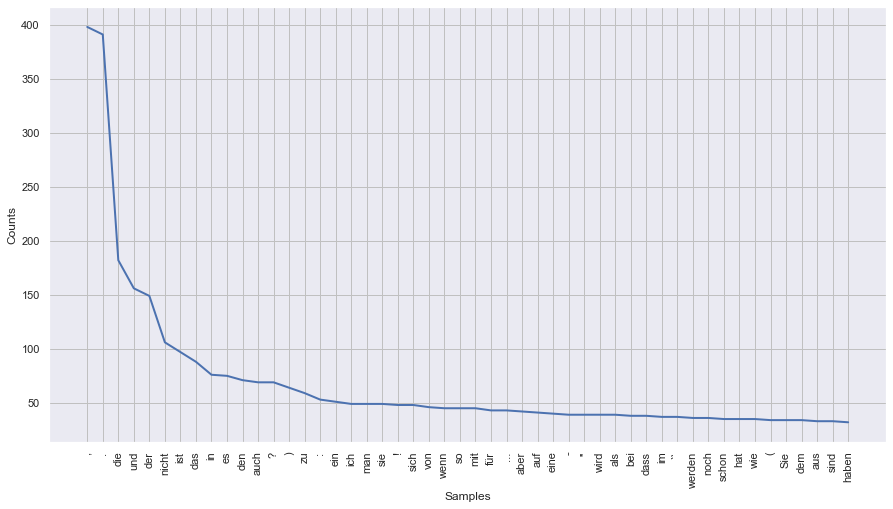

In [143]:
plt.figure(figsize=(15, 8))  

fd = nltk.FreqDist(merged_posts_tokens)
fd.plot(50,cumulative=False)

## label data

In [144]:
posts_sample['label']='public'

In [145]:
posts_sample = posts_sample.drop(columns=['PositiveVotes', 'NegativeVotes'])

In [146]:
posts_sample

,text,label
97833,Der Vektorbegriff ist für die Schüler kein Pro...,public
77603,"Arbeiten ist gut, ich musste mir auch seit jeh...",public
56132,"wenn man ""die Studierenden"" bzw. ""die Lehrende...",public
28346,Also Koller (NT) - Janko ist schon eine perfek...,public
595590,Sind es eigentlich ein und die gleichen Mensch...,public
210329,Das Video aus Polen soll keiner sehen? Auf You...,public
465574,Na fangen's als Erwachsener mit eigenem Hausha...,public
635605,"Was wollen Sie? Er schreibt doch, daß er sich ...",public
98783,Ich hbe de Bchstbn as der Tastrt entfernt! Si...,public
646645,Senkung der Pull-Faktoren: man müsste nur die ...,public


## merge both dataframes to create training set

In [147]:
vertical_stack_posts = pd.concat([posts_sample, activist_messages], axis=0)

In [148]:
vertical_stack_posts

,text,label
97833,Der Vektorbegriff ist für die Schüler kein Pro...,public
77603,"Arbeiten ist gut, ich musste mir auch seit jeh...",public
56132,"wenn man ""die Studierenden"" bzw. ""die Lehrende...",public
28346,Also Koller (NT) - Janko ist schon eine perfek...,public
595590,Sind es eigentlich ein und die gleichen Mensch...,public
210329,Das Video aus Polen soll keiner sehen? Auf You...,public
465574,Na fangen's als Erwachsener mit eigenem Hausha...,public
635605,"Was wollen Sie? Er schreibt doch, daß er sich ...",public
98783,Ich hbe de Bchstbn as der Tastrt entfernt! Si...,public
646645,Senkung der Pull-Faktoren: man müsste nur die ...,public


## save data

In [149]:
vertical_stack_posts.to_csv("training_data_posts.csv", encoding='utf-8', quoting=csv.QUOTE_ALL,header=False, index=False)